In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA, NMF

%matplotlib inline

In [2]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [3]:
type(people)

sklearn.utils.Bunch

In [4]:
people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [5]:
print(people['data'].shape, people['images'].shape, people['target'].shape, people['target_names'].shape)

(3023, 5655) (3023, 87, 65) (3023,) (62,)


In [6]:
people['target_names'][:5]

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie'], dtype='<U25')

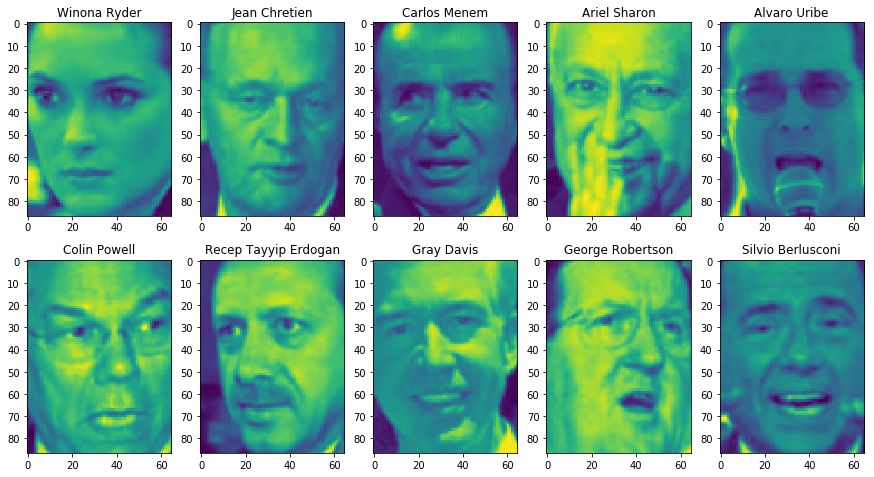

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
for target, image, ax in zip(people['target'], people['images'], axes.ravel()):
    ax.imshow(image)
    ax.set_title(people['target_names'][target])

In [8]:
#value counts
df = pd.DataFrame()
df['label'] = people.target
df['names'] = df['label'].apply(func=lambda x: people.target_names[x])
df['names'].value_counts()

George W Bush                530
Colin Powell                 236
Tony Blair                   144
Donald Rumsfeld              121
Gerhard Schroeder            109
Ariel Sharon                  77
Hugo Chavez                   71
Junichiro Koizumi             60
Jean Chretien                 55
John Ashcroft                 53
Serena Williams               52
Jacques Chirac                52
Vladimir Putin                49
Luiz Inacio Lula da Silva     48
Gloria Macapagal Arroyo       44
Jennifer Capriati             42
Arnold Schwarzenegger         42
Lleyton Hewitt                41
Laura Bush                    41
Hans Blix                     39
Alejandro Toledo              39
Nestor Kirchner               37
Andre Agassi                  36
Alvaro Uribe                  35
Tom Ridge                     33
Silvio Berlusconi             33
Megawati Sukarnoputri         33
Roh Moo-hyun                  32
Vicente Fox                   32
Kofi Annan                    32
          

In [9]:
#take max 50 images for each person
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

In [10]:
X_people = people.data[mask]
y_pelple = people.target[mask]

In [11]:
#change the range from 0-255 to 0-1
X_people = X_people / 255

In [28]:
pca = PCA(n_components=500, whiten=True, random_state=0).fit(X_people)
X_people_pca = pca.transform(X_people)

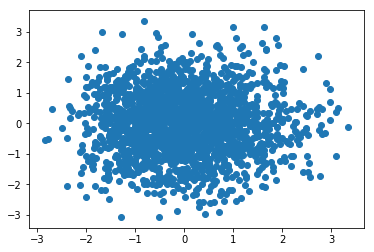

In [29]:
plt.scatter(x=X_people_pca[:, 0], y=X_people_pca[:, 1])

In [30]:
pca.components_.shape

(500, 5655)

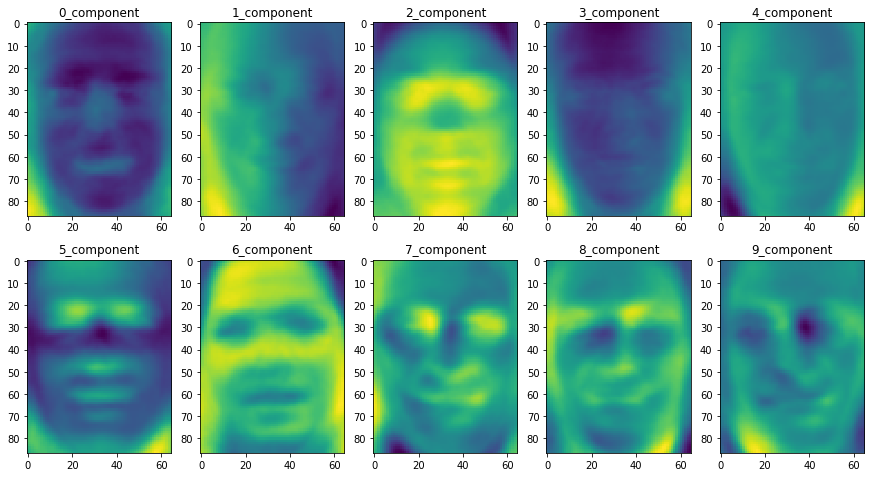

In [31]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(people.images[0].shape))
    ax.set_title(str(i) + "_component")

In [32]:
X_people_pca.shape

(2063, 500)

In [38]:
#image changes using different pca components
images = []
images.append(X_people[0, :])
n_components = [10, 50, 100, 200, 500]
for n in n_components:
    images.append(np.matmul(X_people_pca[0, :n+1], pca.components_[:n+1, :]))
images = np.array(images)

In [39]:
images.shape

(6, 5655)

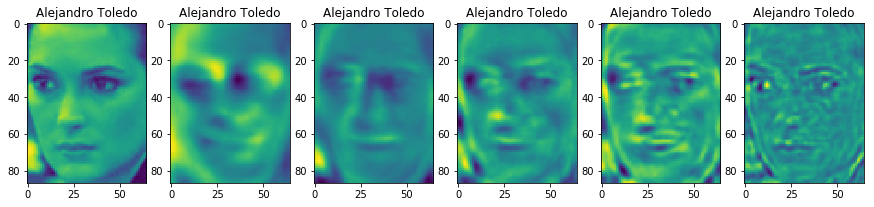

In [43]:
fig, axes = plt.subplots(1, 6, figsize=(15, 8))
for image, ax in zip(images, axes.ravel()):
    ax.imshow(image.reshape(people.images[0].shape))
    ax.set_title(people['target_names'][0])

In [45]:
#nmf application
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_people)
X_people_nmf = nmf.transform(X_people)

In [46]:
X_people_nmf.shape

(2063, 15)

In [47]:
nmf.components_.shape

(15, 5655)

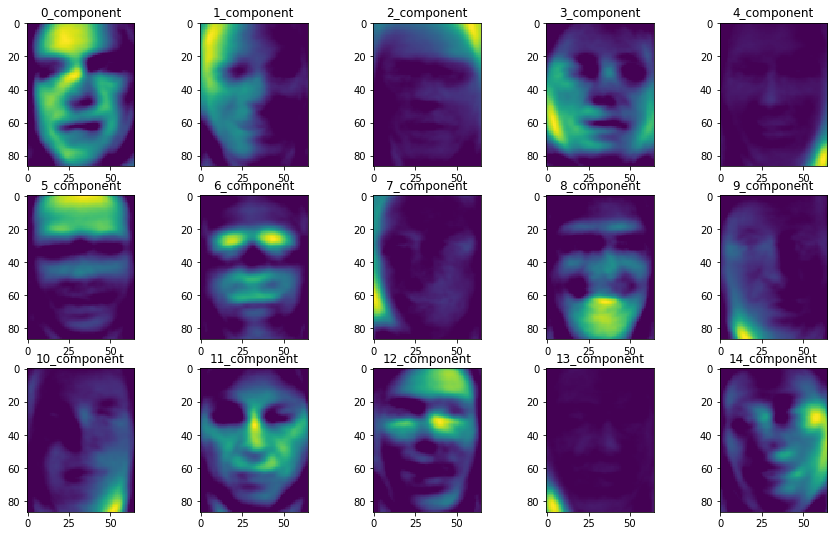

In [48]:
#plot nmf components
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(people.images[0].shape))
    ax.set_title(str(i) + "_component")

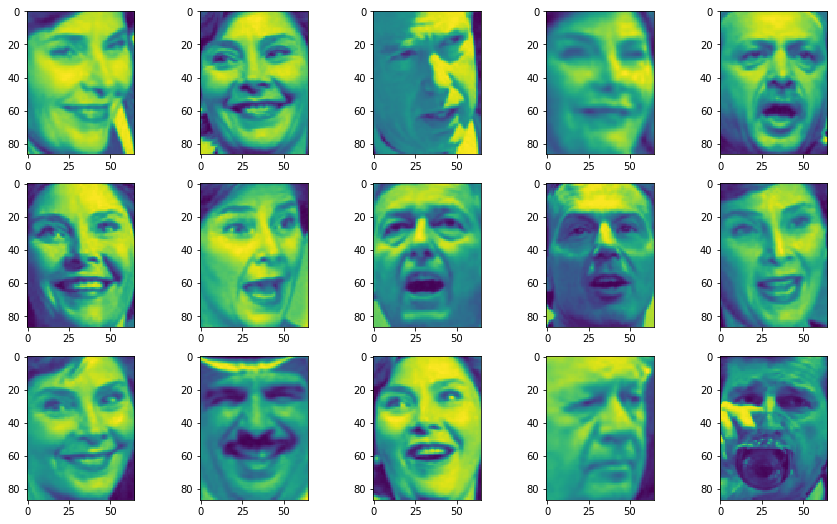

In [57]:
compn = 12
inds = np.argsort(X_people_nmf[:, compn])[::-1]
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_people[ind].reshape(people.images[0].shape))